<center> <h1> Banglore House Prediction using ML (Linear Models) </h1></center>

In [2]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore the harmless warnings
import warnings
warnings.filterwarnings('ignore')

pd.reset_option('display.max_rows')

In [3]:
# -----------------------------------------------
# STEP 1: Data Importing
# -----------------------------------------------
house_df = pd.read_csv('Bengaluru_House_Data.csv')
house_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# shape gives the information about how many rows and how many columns are exist in the dataseta
rows, cols = house_df.shape
print(f'The dataset is having {rows} rows and {cols} columns')

The dataset is having 13320 rows and 9 columns


In [5]:
# info() gives the information about the column and Non-Null value count 
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
# Missing Values 
house_df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
house_df.isnull().sum()/len(house_df)*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [8]:
# 40% data is missing for society column, so drop the society column
house_df.drop(['society'], axis=1, inplace=True)
house_df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [9]:
# Find the Duplicates
print(f'The data has {house_df.duplicated().sum()} duplicate records')

The data has 568 duplicate records


In [10]:
# Remove the duplicates
print("Before deleting the duplicates, the dataset shape is ", house_df.shape)

house_df.drop_duplicates(inplace=True)

print("After deleting the duplicates, the dataset shape is ", house_df.shape)

Before deleting the duplicates, the dataset shape is  (13320, 8)
After deleting the duplicates, the dataset shape is  (12752, 8)


In [11]:
# For missing value treatment, Understand the numerical and categorical columns

numerical_cols = house_df.select_dtypes(include=['int64','float64']).columns.to_list()
categorical_cols = house_df.select_dtypes(include=['object']).columns.to_list()

In [12]:
# Treating the numerical column
house_df.describe()

,bath,balcony,price
count,12679.000000,12147.000000,12752.000000
mean,2.710387,1.582531,114.487603
std,1.359342,0.823359,151.671751
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,73.000000
75%,3.000000,2.000000,122.000000
max,40.000000,3.000000,3600.000000


In [13]:
print("Before treating the numerical category missing values \n")
print (house_df[numerical_cols].isnull().sum())

# Replace null values with median, because it is more appropriate
house_df['bath'].fillna(house_df['bath'].median(), inplace=True)
house_df['balcony'].fillna(house_df['balcony'].median(), inplace=True)

print("\n\nAfter treating the numerical category missing values \n")
print (house_df[numerical_cols].isnull().sum())

Before treating the numerical category missing values 

bath        73
balcony    605
price        0
dtype: int64


After treating the numerical category missing values 

bath       0
balcony    0
price      0
dtype: int64


In [14]:
# Understanding the numerical data

for category in numerical_cols:
    if house_df[category].nunique == 1:
        print(f'*** {category} has 1 unique value')
    else:
        print(f'{category} has {house_df[category].nunique()} unique values')
        if house_df[category].nunique()<=20:
            print(set(house_df[category].tolist()))
    print()

bath has 19 unique values
{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 18.0, 27.0, 40.0}

balcony has 4 unique values
{0.0, 1.0, 2.0, 3.0}

price has 1994 unique values



In [15]:
# Understanding the categorical columns
print("The categorical columns are ", categorical_cols)
print("\nThe missing values are from")
print (house_df[categorical_cols].isnull().sum())

print("----------------------------------------------")

# Drop the missing values
print("Before deleting the missing values the shape of dataset : ", house_df.shape)
house_df.dropna(inplace=True)
print("After deleting the missing values the shape of dataset : ", house_df.shape)
print (house_df[categorical_cols].isnull().sum())

The categorical columns are  ['area_type', 'availability', 'location', 'size', 'total_sqft']

The missing values are from
area_type        0
availability     0
location         1
size            16
total_sqft       0
dtype: int64
----------------------------------------------
Before deleting the missing values the shape of dataset :  (12752, 8)
After deleting the missing values the shape of dataset :  (12735, 8)
area_type       0
availability    0
location        0
size            0
total_sqft      0
dtype: int64


In [16]:
for category in categorical_cols:
    if house_df[category].nunique == 1:
        print(f'*** {category} has 1 unique value')
    else:
        print(f'{category} has {house_df[category].nunique()} unique values')
        if house_df[category].nunique()<40:
            print(set(house_df[category].tolist()))
    print()

area_type has 4 unique values
{'Super built-up  Area', 'Built-up  Area', 'Plot  Area', 'Carpet  Area'}

availability has 80 unique values

location has 1304 unique values

size has 32 unique values
{'6 Bedroom', '6 BHK', '1 RK', '14 BHK', '3 BHK', '5 Bedroom', '2 BHK', '2 Bedroom', '19 BHK', '13 BHK', '27 BHK', '16 BHK', '9 Bedroom', '8 Bedroom', '9 BHK', '5 BHK', '8 BHK', '7 Bedroom', '11 Bedroom', '1 BHK', '7 BHK', '4 BHK', '10 BHK', '10 Bedroom', '43 Bedroom', '18 Bedroom', '3 Bedroom', '1 Bedroom', '4 Bedroom', '2BHK', '12 Bedroom', '11 BHK'}

total_sqft has 2110 unique values



In [17]:
house_df['size'] = house_df['size'].str.extract(r'(\d+)', expand=False).astype(float)
house_df = house_df.rename(columns={'size':'bhk'})
house_df.head()

,area_type,availability,location,bhk,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200,2.0,1.0,51.00


In [18]:
# Method to convert inappropriate data present in total_sqft column

def convert_sqft(x):
    if isinstance(x,str):
        x = x.lower()
        if 'sq. meter' in x:
            num = float(x.replace('sq. meter',''))
            return num * 10.7639

        if 'acres' in x:
            num = float(x.replace('acres',''))
            return num * 43560

        if 'perch' in x:
            num = float(x.replace('perch',''))
            return num * 272.25

        if 'sq. yards' in x:
            num = float(x.replace('sq. yards',''))
            return num * 9

        if 'cents' in x:
            num = float(x.replace('cents',''))
            return num * 435.6

        if 'guntha' in x:
            num = float(x.replace('guntha',''))
            return num * 1089
        
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
        
        try:
            return float(x)
        except:
            return None
    return x

In [19]:
house_df['total_sqft'] = house_df['total_sqft'].apply(convert_sqft).astype(float)

In [20]:
house_df.head()

,area_type,availability,location,bhk,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00


In [21]:
if 'price' in house_df.columns:
# some Kaggle versions have price in lakhs already; we'll compute price_in_rupees if needed
    house_df['price_lakhs'] = house_df['price'].astype(float)
    house_df['price'] = house_df['price_lakhs'] * 100000.0 # convert to rupees
else:
    raise ValueError('price column missing; please check dataset')

# price per sqft
house_df['price_per_sqft'] = house_df['price'] / house_df['total_sqft']

In [22]:
house_df.head()

,area_type,availability,location,bhk,total_sqft,bath,balcony,price,price_lakhs,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,3907000.0,39.07,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,12000000.0,120.00,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,6200000.0,62.00,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,9500000.0,95.00,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,5100000.0,51.00,4250.000000


In [23]:
house_df.describe().round(2)

,bhk,total_sqft,bath,balcony,price,price_lakhs,price_per_sqft
count,12735.00,12734.00,12735.00,12735.00,1.273500e+04,12735.00,12734.00
mean,2.82,1937.87,2.71,1.60,1.145094e+07,114.51,8033.41
std,1.31,17669.25,1.36,0.81,1.516978e+07,151.70,108663.57
min,1.00,1.00,1.00,0.00,8.000000e+05,8.00,2.26
25%,2.00,1100.00,2.00,1.00,5.000000e+06,50.00,4298.59
50%,3.00,1282.00,2.00,2.00,7.300000e+06,73.00,5488.21
75%,3.00,1693.75,3.00,2.00,1.220000e+07,122.00,7407.41
max,43.00,1306800.00,40.00,3.00,3.600000e+08,3600.00,12000000.00


In [24]:
# Remove unnesseary columns - area_type, availability, 

house_df = house_df.drop(columns = ['area_type', 'availability'])

In [25]:
# location

house_df['location'].value_counts()

location
Whitefield           522
Sarjapur  Road       377
Electronic City      286
Kanakpura Road       242
Thanisandra          229
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [26]:
house_df['location'] = house_df['location'].apply(lambda x: x.strip())
location_count = house_df['location'].value_counts()
location_count

location
Whitefield                        523
Sarjapur  Road                    377
Electronic City                   288
Kanakpura Road                    242
Thanisandra                       232
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [27]:
locations_count_ltn_10 = location_count[location_count <= 10]
locations_count_ltn_10

location
Vasanthapura                      10
Sector 1 HSR Layout               10
BTM 1st Stage                     10
Nagappa Reddy Layout              10
Dodsworth Layout                  10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: count, Length: 1060, dtype: int64

In [28]:
house_df['location'] = house_df['location'].apply(lambda x: 'other' if x in locations_count_ltn_10 else x)
house_df['location'].value_counts()

location
other               2927
Whitefield           523
Sarjapur  Road       377
Electronic City      288
Kanakpura Road       242
                    ... 
Kodigehalli           11
LB Shastri Nagar      11
Thyagaraja Nagar      11
Tindlu                11
HAL 2nd Stage         11
Name: count, Length: 234, dtype: int64

### Outliers treatment

In [29]:
house_df.head()

,location,bhk,total_sqft,bath,balcony,price,price_lakhs,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,3907000.0,39.07,3699.810606
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,12000000.0,120.00,4615.384615
2,Uttarahalli,3.0,1440.0,2.0,3.0,6200000.0,62.00,4305.555556
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,9500000.0,95.00,6245.890861
4,Kothanur,2.0,1200.0,2.0,1.0,5100000.0,51.00,4250.000000


In [30]:
# Checking the proper data
house_df[house_df['price_per_sqft'] < 100]

,location,bhk,total_sqft,bath,balcony,price,price_lakhs,price_per_sqft
648,Arekere,9.0,1123031.25,9.0,2.0,26500000.0,265.0,23.596850
1019,other,1.0,231303.60,1.0,0.0,11000000.0,110.0,47.556545
1086,other,2.0,1306800.00,2.0,2.0,2950000.0,29.5,2.257423
7001,Thyagaraja Nagar,8.0,653400.00,6.0,2.0,29000000.0,290.0,44.383226
7607,Bommenahalli,3.0,653400.00,3.0,1.0,21700000.0,217.0,33.210897
11615,other,3.0,261360.00,2.0,0.0,8000000.0,80.0,30.609122


In [31]:
house_df.describe().round()

,bhk,total_sqft,bath,balcony,price,price_lakhs,price_per_sqft
count,12735.0,12734.0,12735.0,12735.0,12735.0,12735.0,12734.0
mean,3.0,1938.0,3.0,2.0,11450940.0,115.0,8033.0
std,1.0,17669.0,1.0,1.0,15169778.0,152.0,108664.0
min,1.0,1.0,1.0,0.0,800000.0,8.0,2.0
25%,2.0,1100.0,2.0,1.0,5000000.0,50.0,4299.0
50%,3.0,1282.0,2.0,2.0,7300000.0,73.0,5488.0
75%,3.0,1694.0,3.0,2.0,12200000.0,122.0,7407.0
max,43.0,1306800.0,40.0,3.0,360000000.0,3600.0,12000000.0


In [32]:
# Checking the proper data
house_df[(house_df['total_sqft'] / house_df['bhk'] < 300.0)]

# total_sqrt - 1020  bhk-6  bath-6, it is not possible, removing the outliers of data

,location,bhk,total_sqft,bath,balcony,price,price_lakhs,price_per_sqft
9,other,6.0,1020.0,6.0,2.0,37000000.0,370.0,36274.509804
45,HSR Layout,8.0,600.0,9.0,2.0,20000000.0,200.0,33333.333333
58,Murugeshpalya,6.0,1407.0,4.0,1.0,15000000.0,150.0,10660.980810
68,Devarachikkanahalli,8.0,1350.0,7.0,0.0,8500000.0,85.0,6296.296296
70,other,3.0,500.0,3.0,2.0,10000000.0,100.0,20000.000000
...,...,...,...,...,...,...,...,...
13221,other,9.0,1178.0,9.0,1.0,7500000.0,75.0,6366.723260
13277,other,7.0,1400.0,7.0,2.0,21800000.0,218.0,15571.428571
13279,other,6.0,1200.0,5.0,2.0,13000000.0,130.0,10833.333333
13281,Margondanahalli,5.0,1375.0,5.0,1.0,12500000.0,125.0,9090.909091


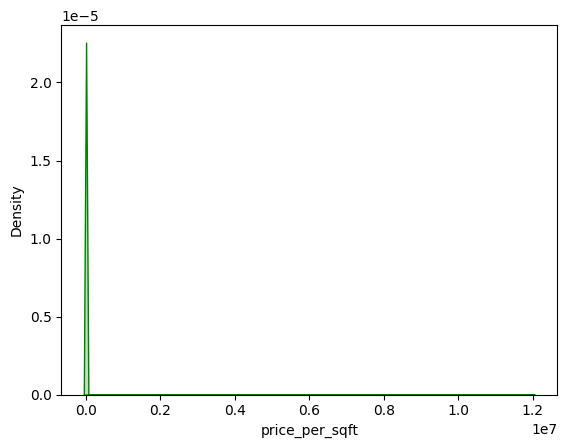

In [33]:

sns.kdeplot(house_df['price_per_sqft'], fill=True, color='green')
plt.show()

In [34]:
house_df['price_per_sqft'].describe()

count    1.273400e+04
mean     8.033406e+03
std      1.086636e+05
min      2.257423e+00
25%      4.298594e+03
50%      5.488213e+03
75%      7.407407e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [35]:

print("Before Deleting the unnecessary data, the dataset shape is ", house_df.shape)

# Remove entries with extremely low or high price_per_sqft using percentile trimming
lower_pps = house_df['price_per_sqft'].quantile(0.01)
upper_pps = house_df['price_per_sqft'].quantile(0.99)
print('price_per_sqft bounds:', lower_pps, upper_pps)
house_df = house_df[(house_df['price_per_sqft'] >= lower_pps) & (house_df['price_per_sqft'] <= upper_pps)]

house_df = house_df[(house_df['total_sqft'] / house_df['bhk'] >= 300.0)]

print("After Deleting the unnecessary data, the dataset shape is ", house_df.shape)

Before Deleting the unnecessary data, the dataset shape is  (12735, 8)
price_per_sqft bounds: 2500.0 24166.666666666668
After Deleting the unnecessary data, the dataset shape is  (11800, 8)


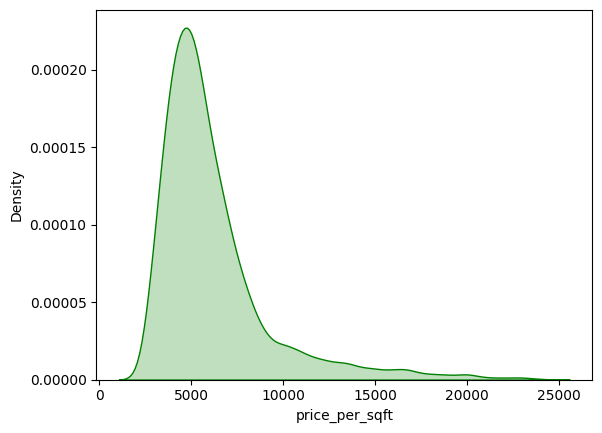

In [36]:

sns.kdeplot(house_df['price_per_sqft'], fill=True, color='green')
plt.show()

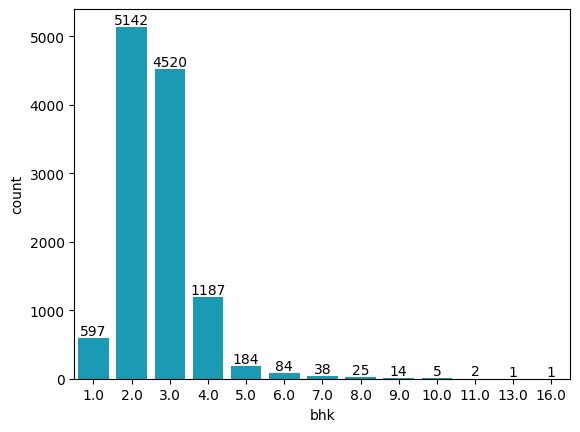

In [37]:
ax = sns.countplot(x=house_df['bhk'], color='#00abcd' )
ax.bar_label(ax.containers[0])
plt.show()

In [38]:
# Removing the balcony and price_per_sqft, price
house_df = house_df.drop(['balcony', 'price_per_sqft', 'price'], axis=1)
house_df.head()

,location,bhk,total_sqft,bath,price_lakhs
0,Electronic City Phase II,2.0,1056.0,2.0,39.07
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00
2,Uttarahalli,3.0,1440.0,2.0,62.00
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00
4,Kothanur,2.0,1200.0,2.0,51.00


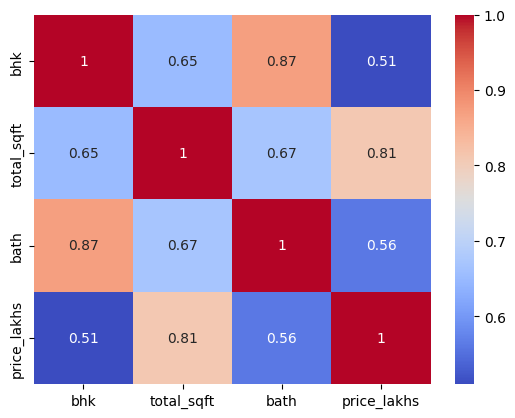

In [39]:
sns.heatmap(house_df.corr(numeric_only=True).round(2), annot=True, cmap='coolwarm')
plt.show()

#### Cleaned Data

In [40]:
house_df.head()

,location,bhk,total_sqft,bath,price_lakhs
0,Electronic City Phase II,2.0,1056.0,2.0,39.07
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00
2,Uttarahalli,3.0,1440.0,2.0,62.00
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00
4,Kothanur,2.0,1200.0,2.0,51.00


In [41]:
house_df.to_csv('cleaned_data.csv')

In [42]:
x = house_df.iloc[:, :-1]
y = house_df.iloc[:,-1]

In [43]:
x.head()

,location,bhk,total_sqft,bath
0,Electronic City Phase II,2.0,1056.0,2.0
1,Chikka Tirupathi,4.0,2600.0,5.0
2,Uttarahalli,3.0,1440.0,2.0
3,Lingadheeranahalli,3.0,1521.0,3.0
4,Kothanur,2.0,1200.0,2.0


In [44]:
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price_lakhs, dtype: float64

### Model Building

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=12)
print('Train shape:', x_train.shape, 'Test shape:', x_test.shape)

Train shape: (9440, 4) Test shape: (2360, 4)


In [47]:
# Build preprocessing + model pipeline
# We'll one-hot encode 'location_clean' (categorical) and scale numeric features.

In [48]:
x_test.shape

(2360, 4)

In [49]:
# Column encoding of categorical columns
# column_tran = make_column_transformer(OneHotEncoder(),['location'],
#                                       remainder = 'passthrough')

column_trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['location']), remainder='passthrough'    # categorical
)

scaler = StandardScaler(with_mean=False)   # Scaling the Numerical columns
lr = LinearRegression()

In [50]:
pipe = make_pipeline(column_trans, scaler, lr)
pipe.fit(x_train, y_train)
y_pred_lr = pipe.predict(x_test)

#### Lasso 

In [51]:
lasso = Lasso()
pipe_lasso = make_pipeline(column_trans, scaler, lasso)
pipe_lasso.fit(x_train, y_train)

,steps,"[('columntransformer', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [52]:
y_pred_lasso = pipe_lasso.predict(x_test)
r2_score(y_test, y_pred_lasso)

0.7076328398128908

### Ridge

In [53]:
ridge = Ridge()
pipe_ridge = make_pipeline(column_trans, scaler, ridge)
pipe_ridge.fit(x_train, y_train)

,steps,"[('columntransformer', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [54]:
y_pred_ridge = pipe_ridge.predict(x_test)
r2_score(y_test, y_pred_ridge)

0.7110667451938816

In [55]:
print ("Linear Regression : ", r2_score(y_test, y_pred_lr))
print ("Lasso Regression : ", r2_score(y_test, y_pred_lasso))
print ("Ridge Regression : ", r2_score(y_test, y_pred_ridge))

Linear Regression :  0.7110705646379734
Lasso Regression :  0.7076328398128908
Ridge Regression :  0.7110667451938816


In [56]:
import pickle

In [57]:
pickle.dump(pipe_ridge, open('house_prediction.pkl', 'wb'))

In [63]:
input = pd.DataFrame([['2nd Stage Nagarbhavi', 2, 1200, 2]], columns=['location', 'bhk', 'total_sqft', 'bath'])
pipe_ridge.predict(input)

array([170.27352495])

In [69]:
pipe = pickle.load(open("C:\Latha\LearnBay\Projects\Linear-Regression\Deploy\house_prediction.pkl", "rb"))
prediction = np.round(pipe.predict(input)[0], 2)
str(prediction)

'170.27'